In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import cv2

In [15]:
!unzip'/content/Flowers-Dataset.zip'

/bin/bash: unzip/content/Flowers-Dataset.zip: No such file or directory


In [16]:
img=cv2.imread('/content/25360380_1a881a5648.jpg')
img

array([[[16, 11, 12],
        [15, 10, 11],
        [15, 10, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[15, 10, 11],
        [15, 10, 11],
        [14,  9, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[15, 10, 11],
        [15, 10, 11],
        [14,  9, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[23, 36, 22],
        [23, 36, 22],
        [25, 38, 24],
        ...,
        [45, 66, 51],
        [45, 66, 51],
        [44, 65, 50]],

       [[19, 32, 18],
        [20, 33, 19],
        [21, 34, 20],
        ...,
        [47, 68, 53],
        [46, 67, 52],
        [45, 66, 51]],

       [[15, 30, 16],
        [16, 31, 17],
        [17, 32, 18],
        ...,
        [47, 68, 53],
        [46, 67, 52],
        [45, 66, 51]]], dtype=uint8)

In [17]:
import matplotlib.pyplot as plt

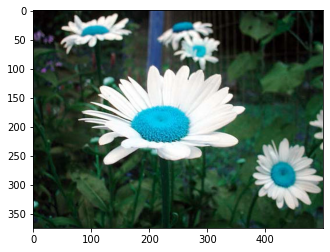

In [18]:
plt.imshow(img)

In [19]:
import numpy as np

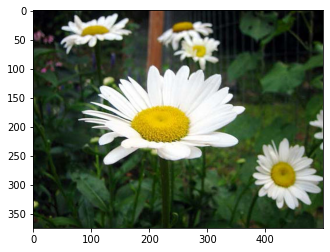

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

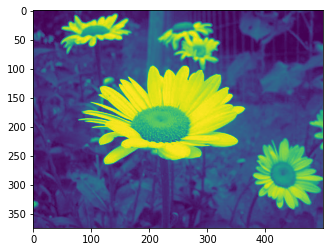

In [21]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

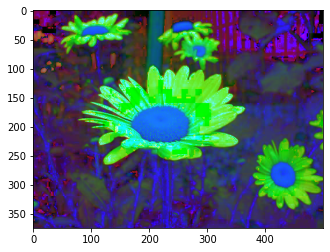

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

**IMAGE RESIZE**

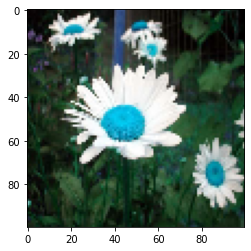

In [23]:
plt.imshow(cv2.resize(img,(100,100)))

In [24]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(375, 500, 3)
(100, 100, 3)


**IMAGE ROTATE**

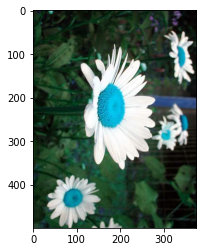

In [25]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

**IMAGE CROP**

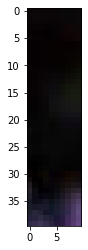

In [26]:
plt.imshow(img[10:50,20:30])

**IMAGE BLUR**

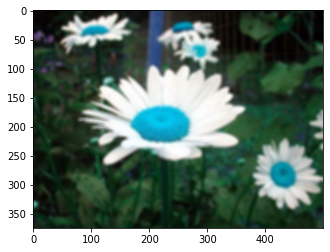

In [27]:
x=cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(x)

In [28]:
cv2.imwrite('image.jpg',img)

True

**IMAGE AUGMENTATION**

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [31]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
x_train=train_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [33]:
x_test=test_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [34]:
x_train.class_indices

{'.Trash-0': 0,
 '.file-revisions-by-id': 1,
 '.shortcut-targets-by-id': 2,
 'MyDrive': 3}

**INITIALIZING CNN AND CREATE MODEL**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

**ADD LAYERS**

In [36]:
model=Sequential()

**INPUT LAYERS(CONVOLUTION,MAXPOOLING,FLATTEN)**

In [37]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [38]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
model.add(Flatten())

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**HIDDEN LAYERS**

In [41]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**OUTPUT LAYERS**

In [42]:
model.add(Dense(5,activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
len(x_train)

1

**SAVE THE MODEL**

In [45]:
model.save('Flowers_classification_model1.h5')

**TEST THE MODEL**

In [46]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [47]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [48]:
img=image.load_img(r"/content/118974357_0faa23cce9_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

FileNotFoundError: ignored